In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Logistic Regression Problem_ Data Set - advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1,inplace=True)

In [5]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [6]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
dtype: int64

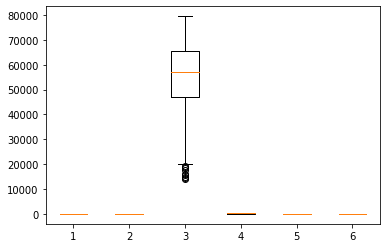

In [7]:
plt.boxplot(df)
plt.show()

In [8]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [9]:
q1 = df.quantile(.25)
q1

Daily Time Spent on Site       51.3600
Age                            29.0000
Area Income                 47031.8025
Daily Internet Usage          138.8300
Male                            0.0000
Clicked on Ad                   0.0000
Name: 0.25, dtype: float64

In [10]:
q3 = df.quantile(.75)
q3

Daily Time Spent on Site       78.5475
Age                            42.0000
Area Income                 65470.6350
Daily Internet Usage          218.7925
Male                            1.0000
Clicked on Ad                   1.0000
Name: 0.75, dtype: float64

In [11]:
iqr = q3 - q1
iqr

Daily Time Spent on Site       27.1875
Age                            13.0000
Area Income                 18438.8325
Daily Internet Usage           79.9625
Male                            1.0000
Clicked on Ad                   1.0000
dtype: float64

In [12]:
lb = q1 - 1.5 * iqr
lb

Daily Time Spent on Site       10.57875
Age                             9.50000
Area Income                 19373.55375
Daily Internet Usage           18.88625
Male                           -1.50000
Clicked on Ad                  -1.50000
dtype: float64

In [13]:
hb = q3 + 1.5 * iqr
hb

Daily Time Spent on Site      119.32875
Age                            61.50000
Area Income                 93128.88375
Daily Internet Usage          338.73625
Male                            2.50000
Clicked on Ad                   2.50000
dtype: float64

In [14]:
cleanDf = df[(df >= lb) & (df <= hb)]
cleanDf

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [15]:
df.shape

(1000, 6)

In [17]:
X = df.drop('Clicked on Ad', axis =1)
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [18]:
y = df['Clicked on Ad']
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1])

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm = confusion_matrix(y_test,y_pred)
print('cm ',cm)

cm  [[105   7]
 [  8  80]]


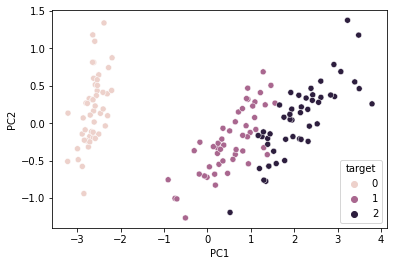

In [27]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Convert the dataset to a pandas dataframe
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Apply PCA with 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Convert the principal components to a pandas dataframe
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the principal components with the target variable
final_df = pd.concat([pc_df, pd.DataFrame(data=iris['target'], columns=['target'])], axis=1)

# Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=final_df, x='PC1', y='PC2', hue='target')
plt.show()
